# Example: Regression with `QNNRegressor`



## Imports

In [1]:

import os
os.environ['OPENBLAS'] = 'openblas'
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.observables import IsingHamiltonian
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import SLSQP, Adam
from src.squlearn.encoding_circuit import ChebyshevRx
from src.squlearn.optimizers import SGLBO

We will use Qiskit's `StatevectorSimulator` for trainning.

In [2]:
executor = Executor("statevector_simulator")

### BO Settings

In [3]:
x0 = [[i * 0.02] for i in range(15)]
options = {"bo_aqc_func":"EI", "bo_aqc_optimizer":"lbfgs", "bo_bounds":[(0.0, 0.3)], "log_file":"log_3", "bo_n_calls": 50, "bo_x0_points": x0, "maxiter": 200}

## `QNNRegressor` Setup

We start by defining a parameterized quantum circuit (PQC)

In [4]:

nqubits = 4
number_of_layers = 2

pqc = ChebyshevRx(nqubits, 1, num_layers=number_of_layers)

We also need an observable

In [5]:
ising_op = IsingHamiltonian(nqubits, I="S", Z="S", ZZ="S")
print(ising_op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII', 'IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZIZI', 'ZZII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[1]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[1]), ParameterExpression(1.0*p[2]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[2]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[2]),
 ParameterExpression(1.0*p[2])])


Now we can create the `QNNRegressor` with the PQC and cost operator. We also specify `SquaredLoss` and `SLSQP` as the loss function and optimizer respectively. Finally we specify random initial parameters for both, the PQC and cost operator.

In [6]:
np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters)
param_op_ini = np.random.rand(ising_op.num_parameters)

reg = QNNRegressor(pqc, ising_op, executor, SquaredLoss(), SGLBO(options), param_ini, param_op_ini)

## Training

Now we are ready to train the model to fit the logarithm funciton

In [7]:
x_space = np.arange(0.1, 0.9, 0.1)
ref_values = np.log(x_space)

reg.fit(x_space, ref_values)

fit:   0%|          | 0/200 [00:00<?, ?it/s]

BOP  fval:  15.814272879618057  x:  [0.0]
BOP  fval:  7.406134666245535  x:  [0.02]
BOP  fval:  50.8228212115754  x:  [0.04]
BOP  fval:  20.429626282082793  x:  [0.06]
BOP  fval:  59.58627452274307  x:  [0.08]
BOP  fval:  68.15283045494269  x:  [0.1]
BOP  fval:  148.1910664963914  x:  [0.12]
BOP  fval:  786.5723032071  x:  [0.14]
BOP  fval:  230.22684213883716  x:  [0.16]
BOP  fval:  300.2740415341456  x:  [0.18]
BOP  fval:  479.6185825273909  x:  [0.2]
BOP  fval:  1073.8329052537167  x:  [0.22]
BOP  fval:  333.4316539751176  x:  [0.24]
BOP  fval:  292.60243231787996  x:  [0.26]
BOP  fval:  1717.2735205115187  x:  [0.28]
BOP  fval:  237.73234564561938  x:  [0.17785338546750554]
BOP  fval:  1546.774057454525  x:  [0.25327972457430525]
BOP  fval:  398.1151211424091  x:  [0.2573836852868271]
BOP  fval:  3360.2839338861795  x:  [0.25417552163523766]
BOP  fval:  582.2095580921484  x:  [0.18706910903579174]
BOP  fval:  365.79478534986595  x:  [0.11531451218780997]
BOP  fval:  181.54366534868

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  15.814272879618057  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  15.814272879618057  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  15.814272879618057  x:  [0.0]
BOP  fval:  15.814272879618057  x:  [0.0]
BOP  fval:  15.814272879618057  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  15.814272879618057  x:  [0.0]
BOP  fval:  15.814272879618057  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  15.814272879618057  x:  [0.0]
BOP  fval:  15.814272879618057  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  15.814272879618057  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  15.814272879618057  x:  [0.0]
BOP  fval:  15.814272879618057  x:  [0.0]
BOP  fval:  17.403258007641064  x:  [0.003319819735406482]
BOP  fval:  15.814272879618057  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  30.738365841839205  x:  [0.06346310543020538]
BOP  fval:  15.814272879618057  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  1438.1821589979102  x:  [0.25057831851702383]
BOP  fval:  15.814272879618057  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  15.814272879618057  x:  [0.0]
BOP  fval:  15.814272879618057  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  15.814272879618057  x:  [0.0]
BOP  fval:  15.814272879618057  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  15.814272879618057  x:  [0.0]
BOP  fval:  15.814272879618057  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  15.814272879618057  x:  [0.0]
 Iteration:  0 :  gp_minimize:  fval:  6.143779894940264  x:  [0.017013893195232957] 
BOP  fval:  6.143779894940264  x:  [0.0]
BOP  fval:  7.587060158875562  x:  [0.02]
BOP  fval:  35.2583384754599  x:  [0.04]
BOP  fval:  37.954533357150346  x:  [0.06]
BOP  fval:  54.16203213981512  x:  [0.08]
BOP  fval:  67.53626097289282  x:  [0.1]
BOP  fval:  51.693329841782486  x:  [0.12]
BOP  fval:  66.41993924171521  x:  [0.14]
BOP  fval:  122.61079917781383  x:  [0.16]
BOP  fval:  131.077837660088  x:  [0.18]
BOP  fval:  20.94961143558226  x:  [0.2]
BOP  fval:  283.63341840728276  x:  [0.22]
BOP  fval:  208.2853542426995  x:  [0.24]
BOP  fval:  88.56944826514406  x:  [0.26]
BOP  fval:  45.5930350604082  x:  [0.28]
BOP  fval:  50.67156171034075  x:  [0.17785338546750554]
BOP  fval:  155.92753079224357  x:  [0.25327972457430525]
BOP  fval:  24.23355406794921  x:  [0.2573836852868271]
BOP  fval:  127.85913356811655  x:  [0.25417552163523766]
BOP  fval:  20.

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.6168424560150445  x:  [0.009727990168463367]
BOP  fval:  89.54452920850282  x:  [0.3]
BOP  fval:  6.143779894940264  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  19.398674101054645  x:  [0.009587834392701682]
BOP  fval:  29.42439303260383  x:  [0.026192561009790765]
BOP  fval:  6.143779894940264  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  6.143779894940264  x:  [0.0]
BOP  fval:  3.3636456859580925  x:  [0.005772911909082029]
BOP  fval:  6.479395784211228  x:  [0.012209307716474544]
BOP  fval:  6.143779894940264  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  38.92440252945444  x:  [0.005343165334154254]
BOP  fval:  25.78469252480137  x:  [0.015667829595823284]
BOP  fval:  12.658316646325952  x:  [0.006635605406649425]
BOP  fval:  55.05741701235581  x:  [0.17383714314072782]
BOP  fval:  6.143779894940264  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  63.80119473684204  x:  [0.14686811951119993]
BOP  fval:  82.6391872711814  x:  [0.19091889347656554]
BOP  fval:  6.143779894940264  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  6.143779894940264  x:  [0.0]
BOP  fval:  42.03086008227552  x:  [0.11146610804784107]
BOP  fval:  161.81955223072256  x:  [0.20404925983011835]
BOP  fval:  25.01628863780793  x:  [0.010796329151336827]
 Iteration:  1 :  gp_minimize:  fval:  3.3636456859580925  x:  [0.005772911909082029] 
BOP  fval:  3.3636456859580925  x:  [0.0]
BOP  fval:  34.28189566058346  x:  [0.02]
BOP  fval:  20.82360691842566  x:  [0.04]
BOP  fval:  28.441598509180167  x:  [0.06]
BOP  fval:  24.719905359421986  x:  [0.08]
BOP  fval:  28.155015614305647  x:  [0.1]
BOP  fval:  30.868498855936405  x:  [0.12]
BOP  fval:  63.70357852838061  x:  [0.14]
BOP  fval:  58.710639753903465  x:  [0.16]
BOP  fval:  59.656664922199155  x:  [0.18]
BOP  fval:  104.49168804046681  x:  [0.2]
BOP  fval:  82.37067480491424  x:  [0.22]
BOP  fval:  304.3340582989083  x:  [0.24]
BOP  fval:  77.8670859079831  x:  [0.26]
BOP  fval:  130.36235835688703  x:  [0.28]
BOP  fval:  91.81024173125009  x:  [0.17785338546750554]
BOP  fv

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.3636456859580925  x:  [0.0]
BOP  fval:  3.3636456859580925  x:  [0.0]
BOP  fval:  3.3636456859580925  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.3636456859580925  x:  [0.0]
BOP  fval:  5.361160526798411  x:  [0.013550186545155518]
BOP  fval:  7.561089772357772  x:  [0.004069600873737444]
BOP  fval:  9.84521320575275  x:  [0.008725645479762748]
BOP  fval:  3.3636456859580925  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.3636456859580925  x:  [0.0]
BOP  fval:  6.957995692174517  x:  [0.046610012825945325]
BOP  fval:  3.3636456859580925  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.3636456859580925  x:  [0.0]
BOP  fval:  28.551889774460207  x:  [0.05210388912760084]
BOP  fval:  26.308611053794323  x:  [0.06819104894474146]
BOP  fval:  57.524189710736614  x:  [0.12790935692383407]
BOP  fval:  20.234613949112223  x:  [0.03281963420075785]
BOP  fval:  166.69971001191664  x:  [0.3]
BOP  fval:  3.3636456859580925  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.3636456859580925  x:  [0.0]
BOP  fval:  143.8446316308586  x:  [0.2670328434566833]
BOP  fval:  36.053077122469965  x:  [0.10629689870818355]
BOP  fval:  27.70079288927554  x:  [0.07344992816068849]
BOP  fval:  10.426192845960916  x:  [0.027909070577989387]
BOP  fval:  10.96961828304636  x:  [0.04375358659606752]
BOP  fval:  131.15678059191004  x:  [0.21053932849231533]
 Iteration:  2 :  gp_minimize:  fval:  3.0241964341687737  x:  [0.017013893195232957] 
BOP  fval:  3.0241964341687737  x:  [0.0]
BOP  fval:  26.386511992113075  x:  [0.02]
BOP  fval:  17.66674181996736  x:  [0.04]
BOP  fval:  30.193460261767342  x:  [0.06]
BOP  fval:  58.29348373672836  x:  [0.08]
BOP  fval:  80.64630954274696  x:  [0.1]
BOP  fval:  91.2563375502444  x:  [0.12]
BOP  fval:  174.32337698306412  x:  [0.14]
BOP  fval:  187.4301727679254  x:  [0.16]
BOP  fval:  282.01677915127226  x:  [0.18]
BOP  fval:  243.6051390540096  x:  [0.2]
BOP  fval:  497.30984910977685  x:  [0.22]
BOP  fval:  254.7753

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.0241964341687737  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.0241964341687737  x:  [0.0]
BOP  fval:  3.0241964341687737  x:  [0.0]
BOP  fval:  3.0241964341687737  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.0241964341687737  x:  [0.0]
BOP  fval:  3.0241964341687737  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.0241964341687737  x:  [0.0]
BOP  fval:  3.0241964341687737  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.0241964341687737  x:  [0.0]
BOP  fval:  3.0241964341687737  x:  [0.0]
BOP  fval:  23.90917755563047  x:  [0.0038792719426659367]
BOP  fval:  3.0241964341687737  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.0241964341687737  x:  [0.0]
BOP  fval:  3.0241964341687737  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.0241964341687737  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.0241964341687737  x:  [0.0]
BOP  fval:  51.10431766889916  x:  [0.044428507182148844]
BOP  fval:  8.01798841376149  x:  [0.011767836518608877]
BOP  fval:  2.675680647081716  x:  [0.008043640222593925]
BOP  fval:  586.6467332085961  x:  [0.25528049152092347]
BOP  fval:  23.932762924615282  x:  [0.05421233343435496]
BOP  fval:  26.95455595055685  x:  [0.03431480194576179]
BOP  fval:  18.95676192296841  x:  [0.027999987907357672]
BOP  fval:  126.74034311674765  x:  [0.06595313383808672]
BOP  fval:  71.59993280593712  x:  [0.10797756782239322]
 Iteration:  3 :  gp_minimize:  fval:  2.675680647081716  x:  [0.008043640222593925] 
BOP  fval:  2.675680647081716  x:  [0.0]
BOP  fval:  25.107901675339605  x:  [0.02]
BOP  fval:  3.4291575598132633  x:  [0.04]
BOP  fval:  6.34928955113673  x:  [0.06]
BOP  fval:  8.474246418284082  x:  [0.08]
BOP  fval:  18.710706588947723  x:  [0.1]
BOP  fval:  6.890711126600019  x:  [0.12]
BOP  fval:  5.0571169912752545  x:  [0.14]
BOP  fval:  5.724

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  2.1805548768258216  x:  [0.0]
BOP  fval:  2.1805548768258216  x:  [0.0]
BOP  fval:  55.880155285790075  x:  [0.04042849617357719]
BOP  fval:  2.1805548768258216  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  2.1805548768258216  x:  [0.0]
BOP  fval:  2.1805548768258216  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  9.813352602609097  x:  [0.04109508562660351]
BOP  fval:  2.1805548768258216  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  2.1805548768258216  x:  [0.0]
BOP  fval:  57.4731264163949  x:  [0.04060523070298338]
BOP  fval:  2.1805548768258216  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  2.1805548768258216  x:  [0.0]
BOP  fval:  2.1805548768258216  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  5.360099218484844  x:  [0.04857065548910521]
BOP  fval:  2.1805548768258216  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  2.1805548768258216  x:  [0.0]
BOP  fval:  2.1805548768258216  x:  [0.0]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  2.1805548768258216  x:  [0.0]
BOP  fval:  4.172531416831461  x:  [0.0355362966373336]
BOP  fval:  669.7420063795845  x:  [0.25532524252019734]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  2.1805548768258216  x:  [0.0]
BOP  fval:  10.651931382074462  x:  [0.044817751112098014]
BOP  fval:  2.1805548768258216  x:  [0.0]
 Iteration:  5 :  gp_minimize:  fval:  2.1805548768258216  x:  [0.0] 


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


## Evaluation

Let's check the trained parameters of the PQC and operator

In [8]:
print("Result PQC params:", reg.param)
print("Result operator params:", reg.param_op)

Result PQC params: [ 1.05602626  0.91237236  0.82610639  0.8001939   1.7824728   1.02502515
  1.24461835  0.2340606   0.20681747  1.28136245  0.12987357  0.06697373
  0.006089    1.71919528 -0.14752102  0.43225762]
Result operator params: [0.10960087 0.5841471  0.34597043]


Also let's plot the predicted function vs. the actual logarithm function

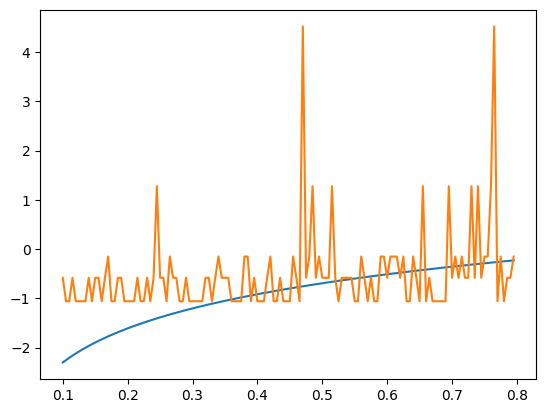

In [9]:
x = np.arange(np.min(x_space), np.max(x_space), 0.005)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)

Let's also plot the error of the QNN.

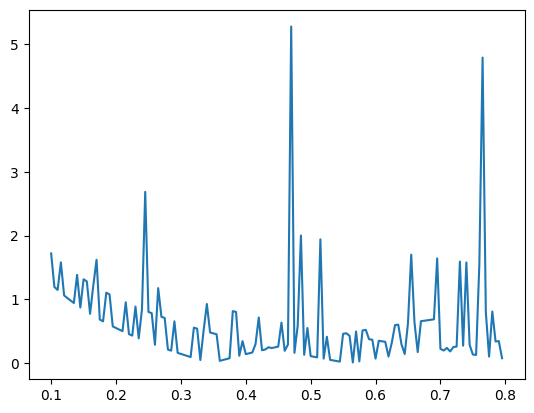

In [10]:
plt.plot(x, np.abs(y - np.log(x)))